## Demonstrating effect of bandpass with human freq

### Set up

In [1]:
import plot_utils
import utils
import filter
from conv_kernel import conv_kernel
import torch

%load_ext autoreload
%autoreload 2


### Frequency domain filter

Demonstrate the effect of bandpass filter on image.  
Two choices: gaussian or butterworth.  


(224, 224)


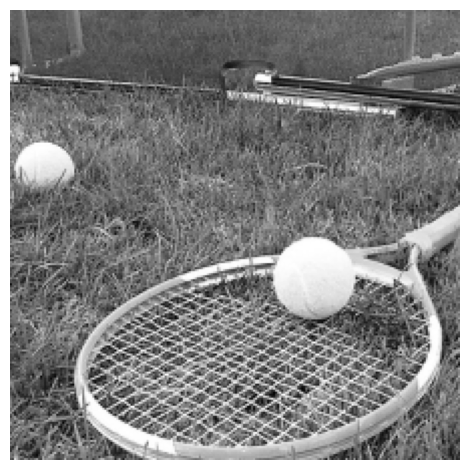

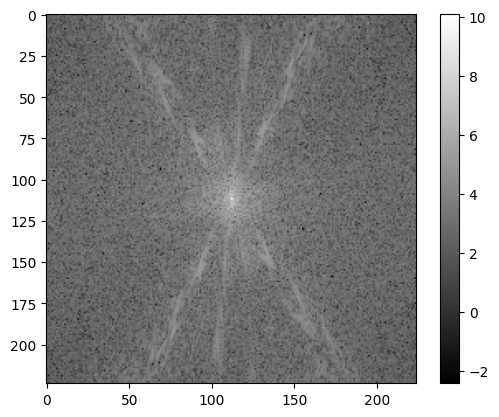

In [2]:
toy_img = utils.read_image('data/demo.JPEG', gray=True, to_float=True, imagenet_transform=True)
print(toy_img.shape)
plot_utils.im_show(toy_img)

img_spectrum = filter.get_image_freq(toy_img)
plot_utils.plot_spectrum(img_spectrum)

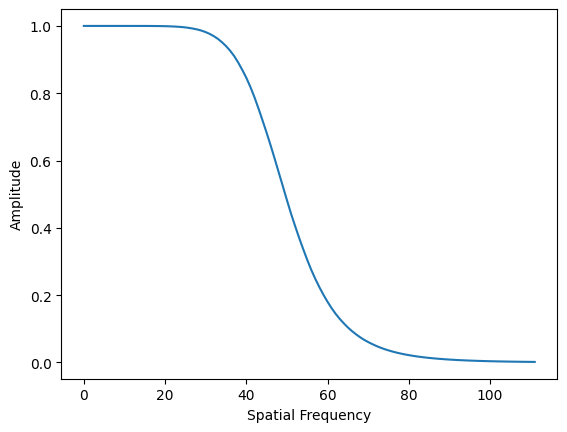

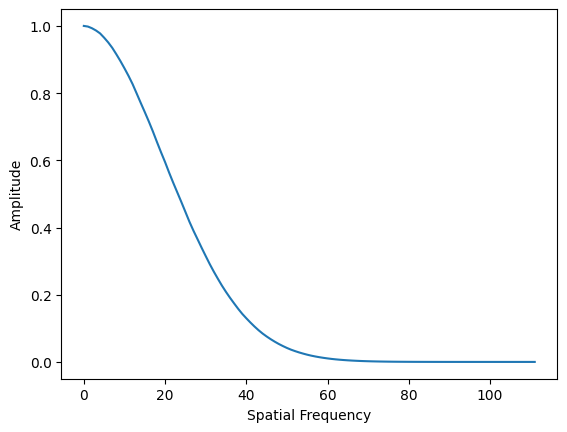

In [3]:
butterworth_lower = filter.butterworth_filter(toy_img.shape, cutoff=50, order = 4)
plot_utils.plot_freq_amplitude(butterworth_lower)
gaussian_lower = filter.gaussian_filter(toy_img.shape, sigma=20)
plot_utils.plot_freq_amplitude(gaussian_lower)

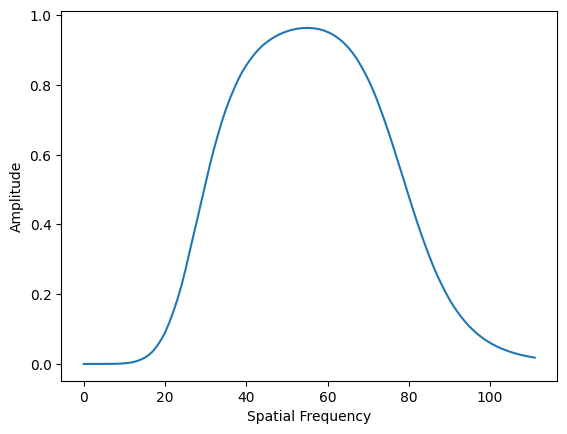

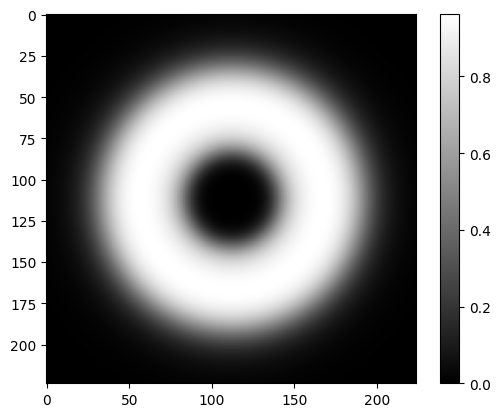

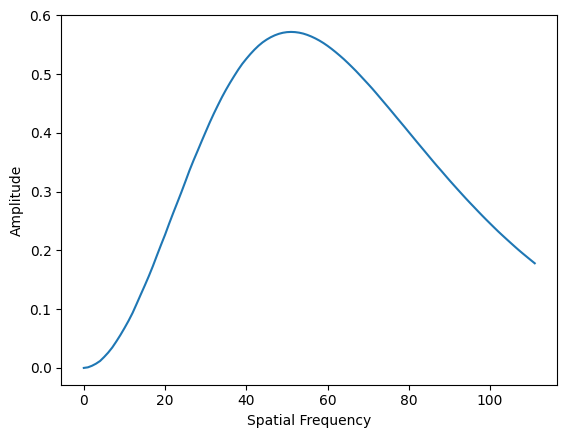

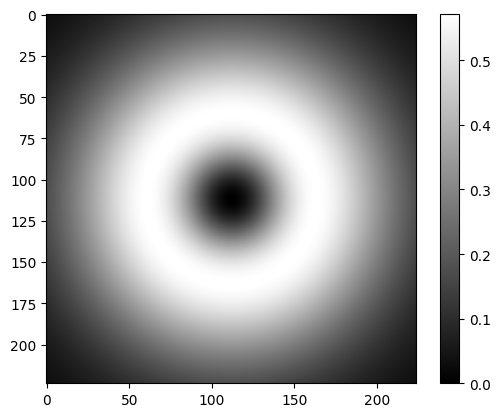

In [4]:
dob = filter.DoB_filter(toy_img.shape, cutoff_low=30, cutoff_high=80, order_low=3, order_high=6)
plot_utils.plot_freq_amplitude(dob)
plot_utils.plot_spectrum(dob)

dog = filter.DoG_filter(toy_img.shape, sigma_low=25, sigma_high=60)
plot_utils.plot_freq_amplitude(dog)
plot_utils.plot_spectrum(dog)

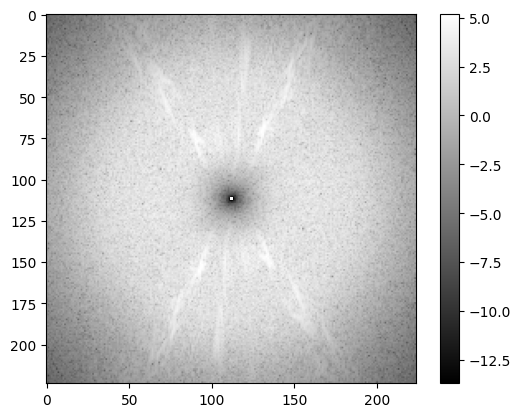

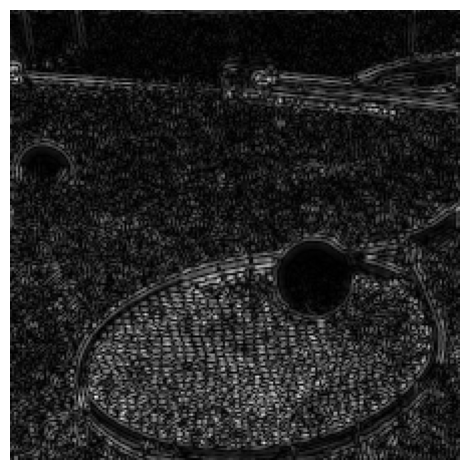

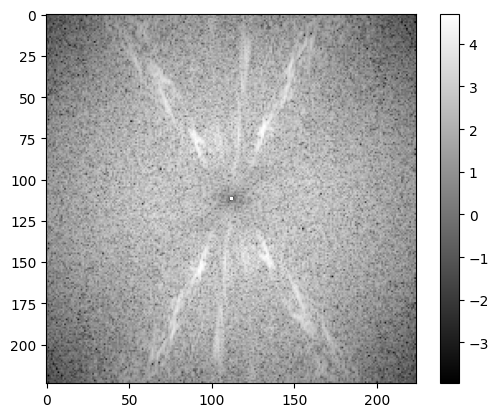

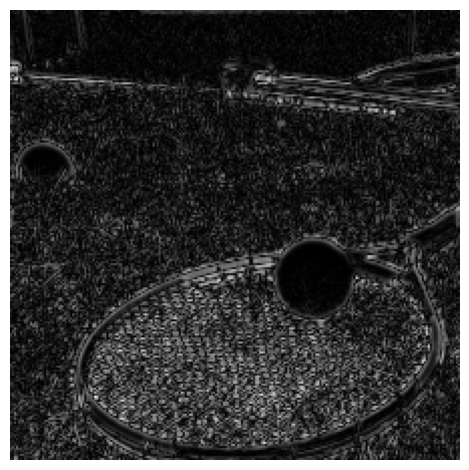

In [38]:
dob_img, filtered_spectrum_dob = filter.filter_image_infreq(toy_img, dob)
plot_utils.plot_spectrum(filtered_spectrum_dob)
plot_utils.im_show(dob_img)

dog_img, filtered_spectrum_dog = filter.filter_image_infreq(toy_img, dog)
plot_utils.plot_spectrum(filtered_spectrum_dog)
plot_utils.im_show(dog_img)

### Spatial domain conv kernel

Compare the effect of:   
1. bandpass filtering in the frequency domain and   
2. a convolution layer in the spatial domain, with weight converted from the frequecy domain filter 

In [7]:
lower_cutoff = 30  # cycles per image
lower_cutoff/= 224.

higher_cutoff = 80
higher_cutoff /= 224.

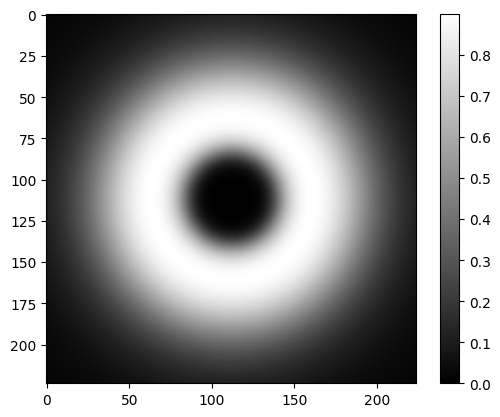

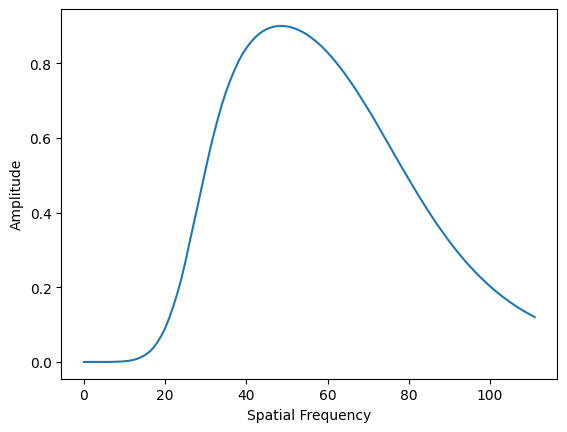

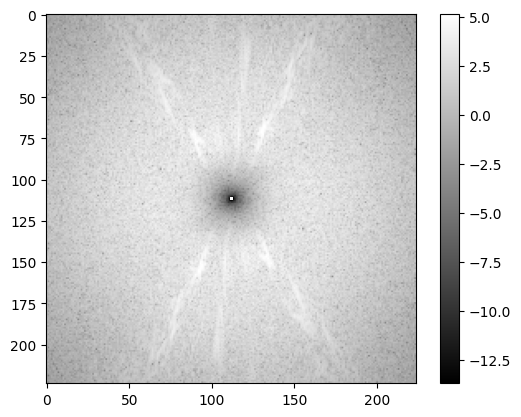

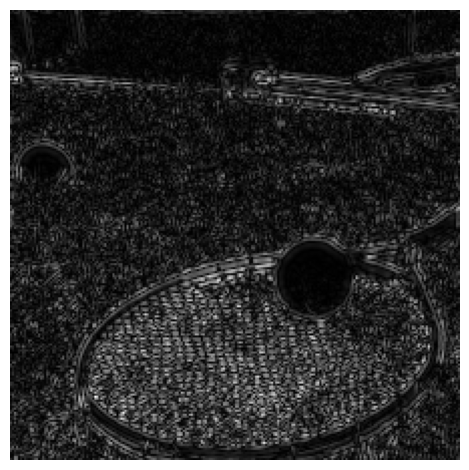

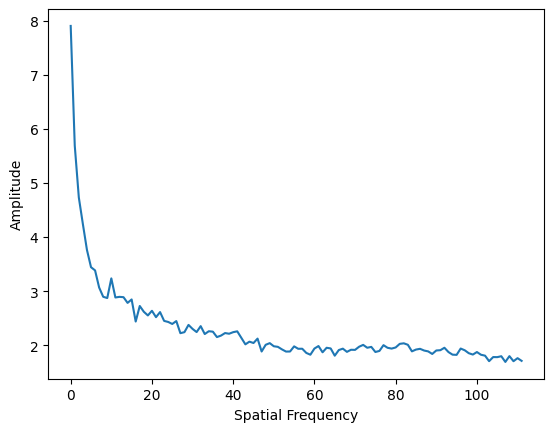

In [39]:
freq_fil = filter.DoB_filter(toy_img.shape, lower_cutoff * 224., higher_cutoff * 224., 3, 3)
# freq_fil = filter.butterworth_filter(toy_img.shape, lower_cutoff * 224., 3)
plot_utils.plot_spectrum(freq_fil)
plot_utils.plot_freq_amplitude(freq_fil)

fil_img, filtered_spectrum_dob = filter.filter_image_infreq(toy_img, freq_fil)
plot_utils.plot_spectrum(filtered_spectrum_dob)
plot_utils.im_show(fil_img)
plot_utils.plot_freq_amplitude(filter.get_image_freq(fil_img))


(11, 11)


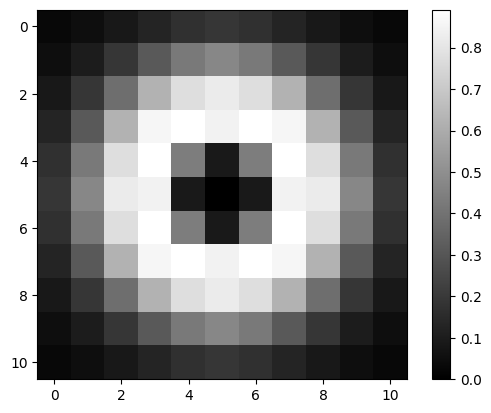

Kernel(
  (conv_real): Conv2d(1, 1, kernel_size=(11, 11), stride=(1, 1), padding=same, bias=False, padding_mode=reflect)
  (conv_imag): Conv2d(1, 1, kernel_size=(11, 11), stride=(1, 1), padding=same, bias=False, padding_mode=reflect)
)


KeyboardInterrupt: 

In [82]:
kernel_size = 11
num_channel = 1

freq_fil = filter.DoB_filter((kernel_size, kernel_size), lower_cutoff * kernel_size, higher_cutoff * kernel_size, 3, 3)
print(freq_fil.shape)
# freq_fil = filter.butterworth_filter((kernel_size, kernel_size), lower_cutoff * kernel_size, 3)
plot_utils.plot_spectrum(freq_fil)

model, spatial_filter = conv_kernel(freq_fil, kernel_size, num_channel)
plot_utils.plot_spectrum(spatial_filter)


toy_img_tensor = torch.tensor(toy_img).unsqueeze(0).unsqueeze(0)
output = model(toy_img_tensor).squeeze(0).squeeze(0).numpy()

plot_utils.im_show(output)
plot_utils.plot_freq_amplitude(filter.get_image_freq(output))